# LSTM on SineWave 

In this project, we aim to use a Long Short-Term Memory (LSTM) neural network to predict and generate a sine wave pattern. The LSTM is a type of recurrent neural network (RNN) that is particularly effective in capturing and learning patterns in sequential data.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Dataset

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

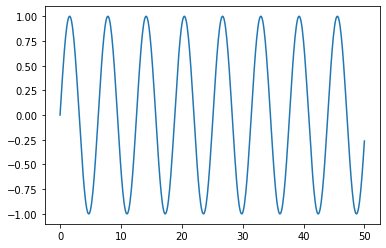

In [5]:
plt.plot(x, y)

In [6]:
dataframe = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
dataframe.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [8]:
dataframe.tail()

,Sine
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400
50.0,-0.262375


In [9]:
test_percent = 0.1

In [10]:
len(dataframe)*test_percent

50.1

In [11]:
test_point = np.round(len(dataframe)*test_percent)

In [12]:
test_point

50.0

In [13]:
test_index = int(len(dataframe) - test_point)

In [14]:
test_index

451

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

In [15]:
train = dataframe.iloc[:test_index]
test = dataframe.iloc[test_index:]

In [16]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [17]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


# Scaling

Scaling is a common preprocessing step in data analysis and machine learning. It involves transforming the features of a dataset to a standard scale, which can help improve the performance and stability of models

MinMaxScaler is a popular scaling technique used in data preprocessing. It scales the features to a specified range, typically between 0 and 1.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [25]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [26]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


# Timeseries Generator

In time series analysis, a common approach is to use a time series generator to generate batches of sequential data for training recurrent neural networks (RNNs) or other time-based models. This allows you to efficiently process and train models on large time series datasets. Here's an example of how you can create a time series generator using the TimeseriesGenerator calss.

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# EarlyStopping

Early stopping is a technique commonly used in machine learning projects, including those involving neural networks such as LSTM, to prevent overfitting and determine the optimal number of training iterations. It allows you to monitor the model's performance during training and stop the training process when the model starts to show signs of overfitting or when further training is unlikely to improve the model's performance.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [28]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [29]:
n_features = 1

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [30]:
model = Sequential()
model.add(LSTM(49, input_shape = (length, n_features)))
model.add(Dense(1))

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [31]:
model.compile(optimizer = 'adam', loss = 'mse')

# Training The Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [32]:
model.fit_generator(generator, epochs = 10, 
                    validation_data = validation_generator, 
                    callbacks = [early_stop])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8140\2873715417.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 10,


Epoch 1/10
402/402 [==============================] - 28s 45ms/step - loss: 0.0126 - val_loss: 7.3062e-04
Epoch 2/10
402/402 [==============================] - 17s 43ms/step - loss: 1.6894e-04 - val_loss: 9.4203e-06
Epoch 3/10
402/402 [==============================] - 15s 38ms/step - loss: 8.4625e-05 - val_loss: 5.2412e-07
Epoch 4/10
402/402 [==============================] - 15s 38ms/step - loss: 1.9440e-04 - val_loss: 5.6304e-07
Epoch 5/10
402/402 [==============================] - 15s 37ms/step - loss: 1.1382e-04 - val_loss: 6.4951e-06


In [33]:
model.save('model_LSTM.h5')

In [34]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

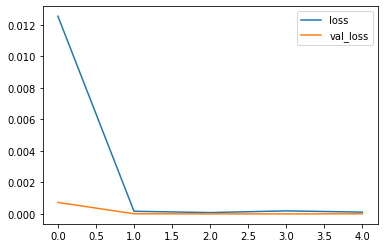

In [35]:
loss.plot()

# Predicting Values

In [36]:
prediction = []
evaluation_batch = scaled_train[-length:]
current_batch = evaluation_batch.reshape(1, length, n_features)
for i in range (len(test)):
    current_prediction = model.predict(current_batch)[0]
    prediction.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis = 1)

1/1 [==============================] - 0s 73ms/step


In [37]:
prediction = scaler.inverse_transform(prediction)

In [38]:
prediction

array([[ 0.90895672],
       [ 0.94907438],
       [ 0.97978042],
       [ 1.00083035],
       [ 1.01197561],
       [ 1.01309307],
       [ 1.00417986],
       [ 0.98534697],
       [ 0.95680731],
       [ 0.91886341],
       [ 0.87190153],
       [ 0.81638311],
       [ 0.75283887],
       [ 0.68186437],
       [ 0.60412087],
       [ 0.52033219],
       [ 0.4312856 ],
       [ 0.33783091],
       [ 0.24087722],
       [ 0.14138607],
       [ 0.04036201],
       [-0.06116212],
       [-0.16214362],
       [-0.26155055],
       [-0.35838396],
       [-0.45169559],
       [-0.54060316],
       [-0.62429662],
       [-0.70203708],
       [-0.7731473 ],
       [-0.83699773],
       [-0.89299095],
       [-0.94055126],
       [-0.97912542],
       [-1.00819671],
       [-1.02731425],
       [-1.03612998],
       [-1.03443523],
       [-1.02218807],
       [-0.99952364],
       [-0.96674713],
       [-0.92431202],
       [-0.87278922],
       [-0.81283523],
       [-0.74516261],
       [-0

In [39]:
test['LSTM Prediction'] = prediction

C:\Users\DELL\AppData\Local\Temp\ipykernel_8140\1456525577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Prediction'] = prediction


In [40]:
test.head()

,Sine,LSTM Prediction
45.1,0.899097,0.908957
45.2,0.938307,0.949074
45.3,0.968142,0.979780
45.4,0.988304,1.000830
45.5,0.998591,1.011976


# Chart Showing Predicted Value And Actual Value

<AxesSubplot:>

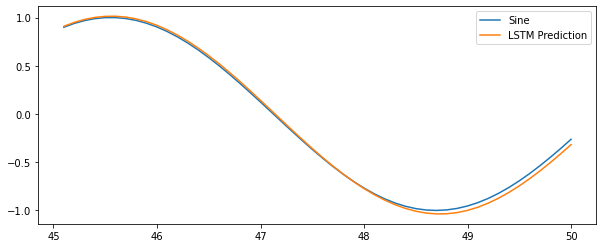

In [41]:
test.plot(figsize = (10, 4))

# Predicting New Range

In [43]:
full_scaler = MinMaxScaler()

In [44]:
full_data_scale = scaler.transform(dataframe)

In [45]:
length = 50 
generator = TimeseriesGenerator(full_data_scale, full_data_scale, length=length, batch_size=1)

In [46]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))

In [47]:
model.compile(optimizer='adam', loss='mse')

In [48]:
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\DELL\AppData\Local\Temp\ipykernel_8140\1408342416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 29s 43ms/step - loss: 0.0123
Epoch 2/6
451/451 [==============================] - 20s 44ms/step - loss: 1.7369e-04
Epoch 3/6
451/451 [==============================] - 17s 37ms/step - loss: 2.2458e-04
Epoch 4/6
451/451 [==============================] - 16s 35ms/step - loss: 2.7799e-04
Epoch 5/6
451/451 [==============================] - 15s 34ms/step - loss: 1.3780e-04
Epoch 6/6
451/451 [==============================] - 16s 36ms/step - loss: 7.2805e-05


In [55]:
loss = pd.DataFrame(model.history.history)

In [49]:
prediction = []
evaluation_batch = full_data_scale[-length:]
current_batch = evaluation_batch.reshape(1, length, n_features)
for i in range (len(test)):
    current_prediction = model.predict(current_batch)[0]
    prediction.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis = 1)

1/1 [==============================] - 0s 50ms/step


In [50]:
prediction

[array([0.41895875], dtype=float32),
 array([0.46918166], dtype=float32),
 array([0.5200364], dtype=float32),
 array([0.5710106], dtype=float32),
 array([0.6215792], dtype=float32),
 array([0.67120713], dtype=float32),
 array([0.71935517], dtype=float32),
 array([0.76548654], dtype=float32),
 array([0.8090756], dtype=float32),
 array([0.849618], dtype=float32),
 array([0.88664246], dtype=float32),
 array([0.9197199], dtype=float32),
 array([0.9484733], dtype=float32),
 array([0.9725896], dtype=float32),
 array([0.991822], dtype=float32),
 array([1.0059961], dtype=float32),
 array([1.0150107], dtype=float32),
 array([1.0188372], dtype=float32),
 array([1.0175124], dtype=float32),
 array([1.011134], dtype=float32),
 array([0.9998526], dtype=float32),
 array([0.98386276], dtype=float32),
 array([0.9633935], dtype=float32),
 array([0.93870205], dtype=float32),
 array([0.91006607], dtype=float32),
 array([0.8777789], dtype=float32),
 array([0.8421456], dtype=float32),
 array([0.80348176], d

In [51]:
prediction = scaler.inverse_transform(prediction)

In [52]:
prediction

array([[-0.16207942],
       [-0.06163442],
       [ 0.04007425],
       [ 0.14202181],
       [ 0.24315816],
       [ 0.34241328],
       [ 0.43870858],
       [ 0.53097058],
       [ 0.618148  ],
       [ 0.69923219],
       [ 0.77328047],
       [ 0.83943478],
       [ 0.89694112],
       [ 0.94517341],
       [ 0.98363788],
       [ 1.01198586],
       [ 1.03001493],
       [ 1.03766787],
       [ 1.03501834],
       [ 1.02226162],
       [ 0.99969894],
       [ 0.96771952],
       [ 0.92678135],
       [ 0.87739882],
       [ 0.82012732],
       [ 0.75555348],
       [ 0.68428752],
       [ 0.60696041],
       [ 0.52422232],
       [ 0.43674426],
       [ 0.34522254],
       [ 0.2503829 ],
       [ 0.15298587],
       [ 0.05383101],
       [-0.04623873],
       [-0.14633701],
       [-0.24553509],
       [-0.342865  ],
       [-0.43733027],
       [-0.52791669],
       [-0.61360918],
       [-0.69341248],
       [-0.76637373],
       [-0.83160845],
       [-0.88832454],
       [-0

In [53]:
prediction_index = np.arange(50.1,55.1,step=0.1)

# New Range Along With Old Range

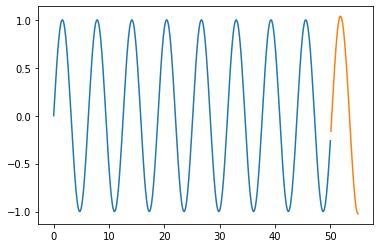

In [54]:
plt.plot(dataframe.index,dataframe['Sine'])
plt.plot(prediction_index,prediction)